In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('seaborn-poster')

In [3]:
roads = gpd.read_file('Buffer_of_Transportation___Roads/Buffer_of_Transportation___Roads.shp')
roads.head()

,PRIME_NAME,ADDR_L_FR,ADDR_L_TO,ADDR_R_FR,ADDR_R_TO,ZIPCODE_L,ZIPCODE_R,MUNI_L,MUNI_R,ZIPNAME_L,...,FEATSTATUS,UPDATEDATE,SEG_GUID,STATE_L,STATE_R,TRAVEL_DIR,BUFF_DIST,ORIG_FID,AnalysisAr,geometry
0,Coles St,0,0,0,0,07310,07310,885264,885264,JERSEY CITY,...,F,2014-06-04,215ab732-1708-11,NJ,NJ,B,29.0,195,0.000155,"POLYGON ((617935.552 691887.904, 617932.382 69..."
1,None,0,0,0,0,07302,07302,885264,885264,JERSEY CITY,...,F,2013-11-15,2abb59c6-1708-11,NJ,NJ,B,29.0,220,0.000164,"POLYGON ((619421.990 686477.769, 619424.017 68..."
2,Giles Ave,1,23,2,20,07306,07306,885264,885264,JERSEY CITY,...,F,2014-06-10,2a4173cc-1708-11,NJ,NJ,B,29.0,520,0.000355,"POLYGON ((610364.156 692520.495, 610406.546 69..."
3,Ege Ave,243,241,244,242,07304,07304,885264,885264,JERSEY CITY,...,F,2014-06-04,2879c7d8-1708-11,NJ,NJ,B,29.0,863,0.002495,"POLYGON ((606816.417 686027.204, 606835.627 68..."
4,Thomas Conrad Dr,0,0,0,0,07305,07305,885264,885264,JERSEY CITY,...,F,2014-06-04,333c03b6-1708-11,NJ,NJ,B,29.0,1023,0.000223,"POLYGON ((615005.365 679057.977, 615016.040 67..."


In [4]:
bikelane = pd.read_csv('Road_bikelane_0.csv')
citibike = pd.read_csv('Road_citibike_0.csv')
crash = pd.read_csv('Road_crash_0.csv')
crash_1000 = pd.read_csv('Road_crash_1000feet_0.csv')
crash_500 = pd.read_csv('Road_crash_500feet_0.csv')
park = pd.read_csv('Road_park_0.csv')
pathstation = pd.read_csv('Road_pathstation_0.csv')
schoollibrary = pd.read_csv('Road_schoollibrary_0.csv')

In [5]:
roads.shape,bikelane.shape,citibike.shape,crash.shape,park.shape,pathstation.shape,schoollibrary.shape,crash_1000.shape,crash_500.shape

((3242, 42),
 (3242, 43),
 (3242, 43),
 (3242, 44),
 (3242, 43),
 (3242, 43),
 (3242, 43),
 (3242, 43),
 (3242, 43))

In [6]:
a = roads.merge(bikelane.rename(columns={'Summarized length in Meters':'bikelane_length'})[['ORIG_FID','bikelane_length']], on='ORIG_FID')
b = a.merge(citibike.rename(columns={'Summarized length in Feet':'citibike_length'})[['ORIG_FID','citibike_length']], on='ORIG_FID')
c = b.merge(crash.rename(columns={'Count of Points':'# crash', 'Average severity_rating10':'avg_severity_rating'})[['ORIG_FID','# crash','avg_severity_rating']], on='ORIG_FID')
d = c.merge(park.rename(columns={'Summarized area in Square Meters':'park_area'})[['ORIG_FID','park_area']], on='ORIG_FID')
e = d.merge(pathstation.rename(columns={'Count of Points':'# path_station'})[['ORIG_FID','# path_station']], on='ORIG_FID')
f = e.merge(schoollibrary.rename(columns={'Count of Points':'# school_library'})[['ORIG_FID','# school_library']], on='ORIG_FID')
g = f.merge(crash_1000.rename(columns={'Count of Points':'# crash_1000'})[['ORIG_FID','# crash_1000']], on='ORIG_FID')
roads_df = g.merge(crash_500.rename(columns={'Count of Points':'# crash_500'})[['ORIG_FID','# crash_500']], on='ORIG_FID')

In [7]:
roads_df['# crash_1000'] = roads_df['# crash_1000']-roads_df['# crash_500']
roads_df['# crash_500'] = roads_df['# crash_500']-roads_df['# crash']

/Volumes/COSMOS/ProgramFiles/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


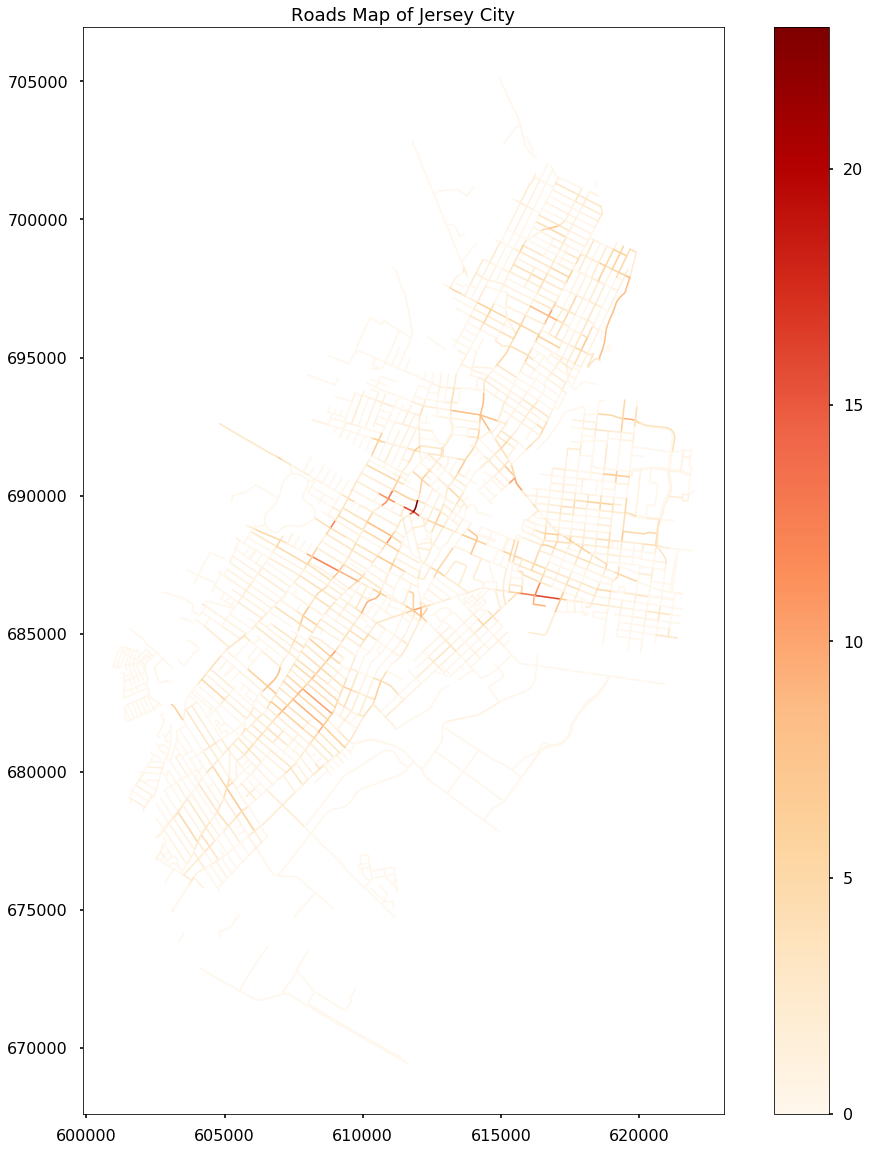

In [8]:
f, ax = plt.subplots(1, figsize=(18,20))
ax.set_title("Roads Map of Jersey City", fontsize=18)
roads_df.plot(axes=ax, column='# crash', legend = True, cmap='OrRd')

In [9]:
#roads_df.to_csv('roads_metics')

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [11]:
roads_df.columns

Index(['PRIME_NAME', 'ADDR_L_FR', 'ADDR_L_TO', 'ADDR_R_FR', 'ADDR_R_TO',
       'ZIPCODE_L', 'ZIPCODE_R', 'MUNI_L', 'MUNI_R', 'ZIPNAME_L', 'ZIPNAME_R',
       'SYMBOLTYPE', 'STATUS', 'SURFACE', 'ZLEV_FR', 'ZLEV_TO', 'ACCESSTYPE',
       'JURIS', 'L1_NAME', 'L2_NAME', 'H1_NAME', 'H1_SHLD', 'H1_SUBSHLD',
       'H1_NUM', 'H2_NAME', 'H2_SHLD', 'H2_SUBSHLD', 'H2_NUM', 'H3_NAME',
       'H3_SHLD', 'H3_SUBSHLD', 'H3_NUM', 'FEATSTATUS', 'UPDATEDATE',
       'SEG_GUID', 'STATE_L', 'STATE_R', 'TRAVEL_DIR', 'BUFF_DIST', 'ORIG_FID',
       'AnalysisAr', 'geometry', 'bikelane_length', 'citibike_length',
       '# crash', 'avg_severity_rating', 'park_area', '# path_station',
       '# school_library', '# crash_1000', '# crash_500'],
      dtype='object')

In [12]:
metrics = ['bikelane_length', 'citibike_length','# crash', '# crash_500', '# crash_1000', 'avg_severity_rating', 
           'park_area', '# path_station', '# school_library']

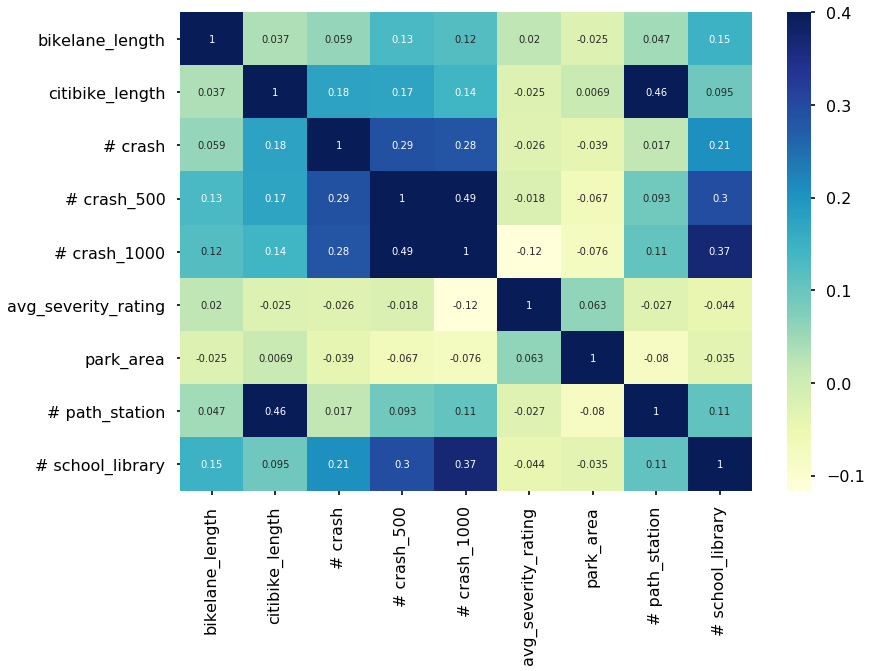

In [13]:
corr = roads_df[metrics].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmax=0.4)

In [14]:
df = roads_df[['geometry','AnalysisAr']+metrics]
for m in metrics:
    df[m] = df[m]/df['AnalysisAr']
df.head()

/Volumes/COSMOS/ProgramFiles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,geometry,AnalysisAr,bikelane_length,citibike_length,# crash,# crash_500,# crash_1000,avg_severity_rating,park_area,# path_station,# school_library
0,"POLYGON ((617935.552 691887.904, 617932.382 69...",0.000155,0.00000,4.501009e+06,0.000000,12936.610608,25873.221216,NaN,0.000000e+00,0.000000,0.000000
1,"POLYGON ((619421.990 686477.769, 619424.017 68...",0.000164,107908.79097,2.421416e+07,0.000000,30506.406345,73215.375229,NaN,0.000000e+00,24405.125076,0.000000
2,"POLYGON ((610364.156 692520.495, 610406.546 69...",0.000355,0.00000,0.000000e+00,2813.256063,0.000000,36572.328813,2813.256063,0.000000e+00,5626.512125,11253.024250
3,"POLYGON ((606816.417 686027.204, 606835.627 68...",0.002495,0.00000,8.395811e+04,1603.334937,3206.669873,6814.173481,801.667468,0.000000e+00,0.000000,801.667468
4,"POLYGON ((615005.365 679057.977, 615016.040 67...",0.000223,0.00000,0.000000e+00,0.000000,0.000000,0.000000,NaN,7.534036e+07,0.000000,0.000000


In [17]:
df['avg_severity_rating'].fillna(0, inplace=True)
df[metrics] = StandardScaler().fit_transform(df[metrics])
df.head()

/Volumes/COSMOS/ProgramFiles/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Volumes/COSMOS/ProgramFiles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Volumes/COSMOS/ProgramFiles/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,geometry,AnalysisAr,bikelane_length,citibike_length,# crash,# crash_500,# crash_1000,avg_severity_rating,park_area,# path_station,# school_library
0,"POLYGON ((617935.552 691887.904, 617932.382 69...",0.000155,-0.435571,-0.237992,-0.584567,0.349034,0.190681,-0.497200,-0.260534,-0.463066,-0.596501
1,"POLYGON ((619421.990 686477.769, 619424.017 68...",0.000164,1.801649,0.344854,-0.584567,1.908823,2.260138,-0.497200,-0.260534,6.696176,-0.596501
2,"POLYGON ((610364.156 692520.495, 610406.546 69...",0.000355,-0.435571,-0.371071,0.276387,-0.799436,0.658369,1.023496,-0.260534,1.187471,4.639563
3,"POLYGON ((606816.417 686027.204, 606835.627 68...",0.002495,-0.435571,-0.368588,-0.093891,-0.514759,-0.642442,-0.063861,-0.260534,-0.463066,-0.223483
4,"POLYGON ((615005.365 679057.977, 615016.040 67...",0.000223,-0.435571,-0.371071,-0.584567,-0.799436,-0.940309,-0.497200,9.624943,-0.463066,-0.596501


In [18]:
# assign weight on each feature
weights = [8, 5, 10, 9, 8, 5, 1, 3, 2]
for i in range(len(metrics)):
    df[metrics[i]] = df[metrics[i]]*weights[i]

/Volumes/COSMOS/ProgramFiles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
s = [silhouette_score(df[metrics], KMeans(n_clusters=i).fit(df[metrics]).labels_) for i in range(2,21)]
dict(zip(range(2,11),s))

{2: 0.5071208678240562,
 3: 0.47162707333024473,
 4: 0.48382094877309706,
 5: 0.34858410454809036,
 6: 0.3699239919809872,
 7: 0.3329267682545631,
 8: 0.3356588020443632,
 9: 0.295487331244744,
 10: 0.29587474422320026}

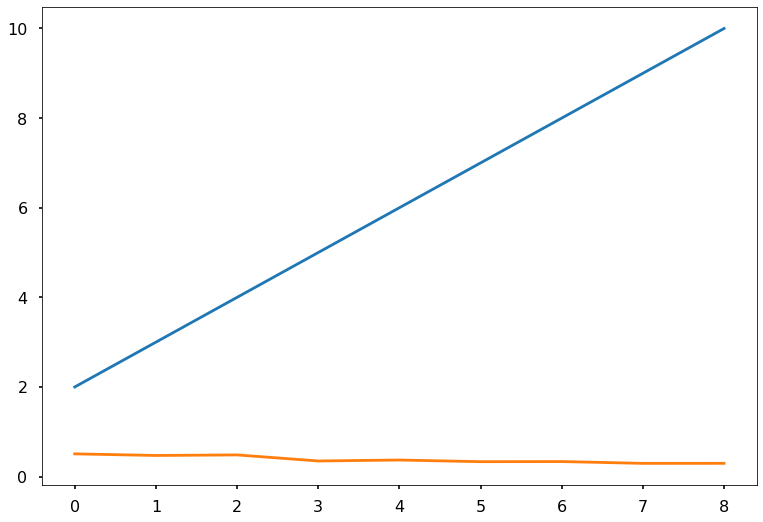

In [20]:
plt.plot(tuple(zip(range(2,11),s)))

In [21]:
kmeans = KMeans(n_clusters=4).fit(df[metrics])

In [22]:
df['cluster'] = kmeans.labels_

/Volumes/COSMOS/ProgramFiles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/Volumes/COSMOS/ProgramFiles/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


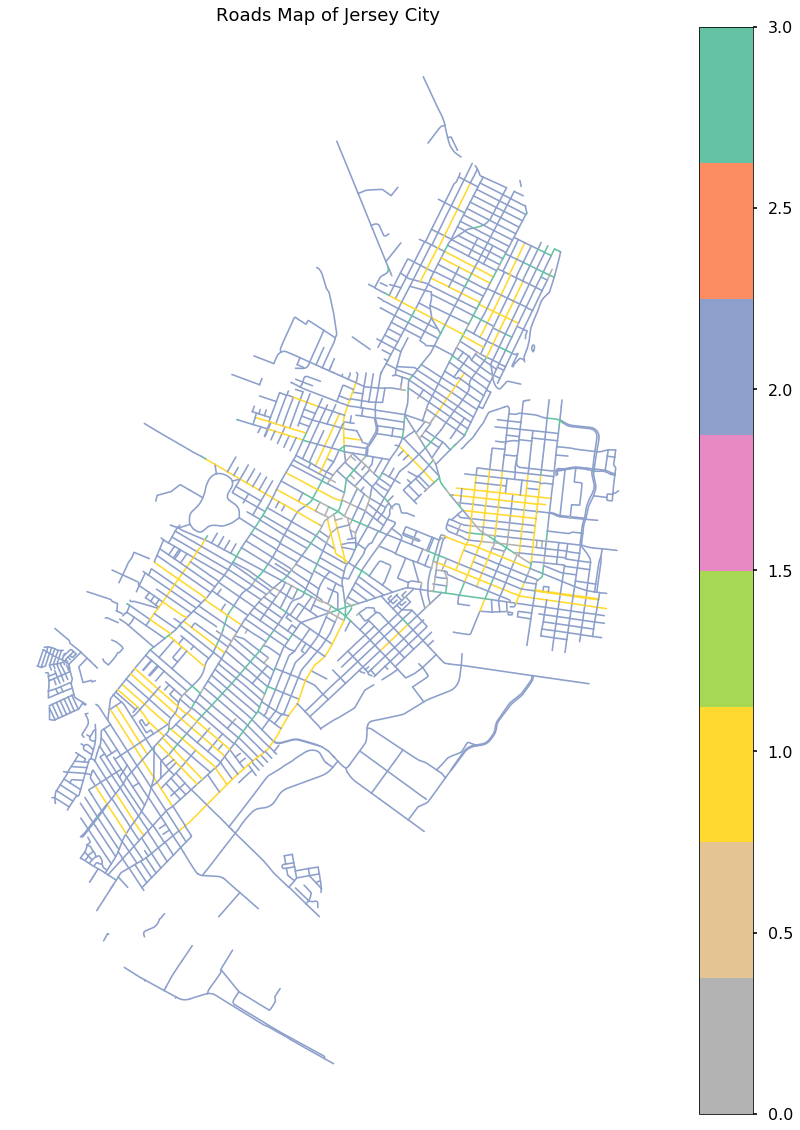

In [39]:
f, ax = plt.subplots(1, figsize=(18,20))
ax.set_title("Roads Map of Jersey City", fontsize=18)
df.plot(axes=ax, column='cluster', legend = True, 
        cmap=plt.cm.Set2_r)
ax.set_axis_off()

In [24]:
df_group = df[metrics+['cluster']].groupby('cluster').mean()
for i in range(len(metrics)):
    df_group[metrics[i]] = df_group[metrics[i]]/weights[i]

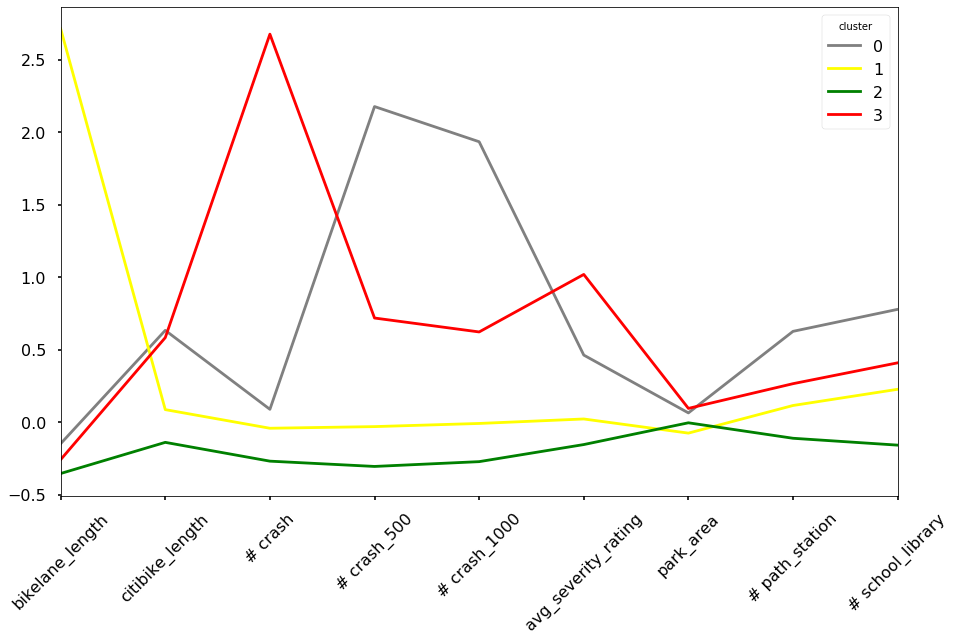

In [26]:
ax = df_group.T.plot(figsize=(15,9), color=['gray','yellow','green','red'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [27]:
# finding weight
from statsmodels.api import OLS
from sklearn.ensemble import RandomForestRegressor

In [28]:
df.columns

Index(['geometry', 'AnalysisAr', 'bikelane_length', 'citibike_length',
       '# crash', '# crash_500', '# crash_1000', 'avg_severity_rating',
       'park_area', '# path_station', '# school_library', 'cluster'],
      dtype='object')

In [29]:
X = df.drop(columns=['geometry', 'AnalysisAr', '# crash', 'cluster'], )
y = df['# crash']

In [30]:
model = OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                # crash   R-squared (uncentered):                   0.299
Model:                            OLS   Adj. R-squared (uncentered):              0.297
Method:                 Least Squares   F-statistic:                              172.2
Date:                Fri, 06 Dec 2019   Prob (F-statistic):                   1.27e-242
Time:                        19:32:24   Log-Likelihood:                         -11490.
No. Observations:                3242   AIC:                                  2.300e+04
Df Residuals:                    3234   BIC:                                  2.304e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
bikelane_length        -0.0084      0.019     -0.451      0.652      -0.045       0.028
citibike_length         0.2455      0.033      7.388      0.000       0.180       0.311
# crash_500             0.1382      0.021      6.528      0.000       0.097       0.180
# crash_1000            0.1145      0.025      4.600      0.000       0.066       0.163
avg_severity_rating     0.8459      0.031     27.527      0.000       0.786       0.906
park_area              -0.0401      0.148     -0.270      0.787      -0.331       0.251
# path_station         -0.2079      0.056     -3.713      0.000      -0.318      -0.098
# school_library        0.2231      0.082      2.734      0.006       0.063       0.383
==============================================================================
Omnibus:                     2166.194   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51450.060
Skew:                           2.818   Prob(JB):                         0.00
Kurtosis:                      21.684   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model.params.sort_values(ascending=False)

avg_severity_rating    0.845868
citibike_length        0.245500
# school_library       0.223091
# crash_500            0.138221
# crash_1000           0.114535
bikelane_length       -0.008399
park_area             -0.040084
# path_station        -0.207950
dtype: float64

In [32]:
rf = RandomForestRegressor().fit(X, y)
rf.score(X, y)

/Volumes/COSMOS/ProgramFiles/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9093279177840079

In [33]:
sorted(zip(X.columns, rf.feature_importances_), key=lambda x:x[1], reverse=True)

[('avg_severity_rating', 0.47855240535286303),
 ('# crash_500', 0.15125108078973354),
 ('# crash_1000', 0.13190418557872421),
 ('citibike_length', 0.07429937568316404),
 ('# school_library', 0.0671836022867152),
 ('# path_station', 0.04675074686203702),
 ('bikelane_length', 0.031667204184215814),
 ('park_area', 0.018391399262547042)]